## Observations and Insights 

Through the analysis of the data, a few outcomes can be deduced. Based on the boxplot of the various drugs used compared to tumor volume, it can be seen that ramicane was one of the better performing drugs. This is due to a lower tumor volume being seen while on the drug. Those in charge of the study were using an almost equal number of males to females, which helps to minimize the possible effects sex may take in the study. The drug Ketapril seemed to be the worst performing drug, having a greater mean tumor volume than even the placebo.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how = "left", on = ["Mouse ID"])
# Display the data table for preview
data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_df = len(data_df["Mouse ID"].unique())
mice_df

249

In [3]:
# Getting the duplicate entries by mouse ID number that show up for Mouse ID and Timepoint. 
data_df.loc[data_df.duplicated(keep = False),:]
#df.loc[df.duplicated(), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

data_df.loc[data_df["Mouse ID"] == "g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = data_df.drop(data_df[data_df["Mouse ID"] == "g989"].index)
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_data_df["Mouse ID"]
len(clean_mice.unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_df = clean_data_df.groupby("Drug Regimen")
mean = summary_df["Tumor Volume (mm3)"].mean()
median = summary_df["Tumor Volume (mm3)"].median()
variance = summary_df["Tumor Volume (mm3)"].var(ddof=0)
standard_dev = summary_df["Tumor Volume (mm3)"].std(ddof=0)
sample = clean_data_df.sample(100)
SEM = st.sem(sample["Tumor Volume (mm3)"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_group_df = pd.DataFrame({"Mean":mean, "Median":median, "Variance":variance, "Standard Deviation":standard_dev,
                                 "SEM":SEM})
summary_group_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.854142
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.854142
Infubinol,52.884795,51.820584,42.886388,6.548770,0.854142
Ketapril,55.235638,53.698743,68.188930,8.257659,0.854142
Naftisol,54.331565,52.509285,65.817708,8.112811,0.854142
Placebo,54.033581,52.288934,60.830138,7.799368,0.854142
Propriva,52.320930,50.446266,43.555716,6.599675,0.854142
Ramicane,40.216745,40.673236,23.383692,4.835669,0.854142
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.854142


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_df.agg({"Tumor Volume (mm3)":["mean", "median","var","std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

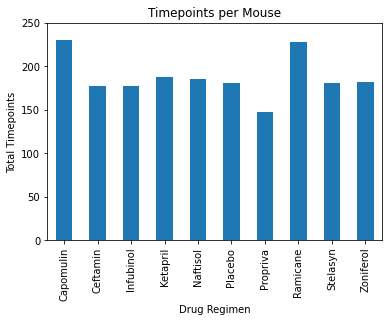

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
time_data = clean_data_df.groupby(["Drug Regimen"])["Timepoint"].count()

time_chart = time_data.plot(kind = "bar", title = "Timepoints per Mouse")
time_chart.set_ylabel("Total Timepoints")
plt.ylim(0,250)
plt.show()

Text(0.5, 1.0, 'Timepoints per Mouse')

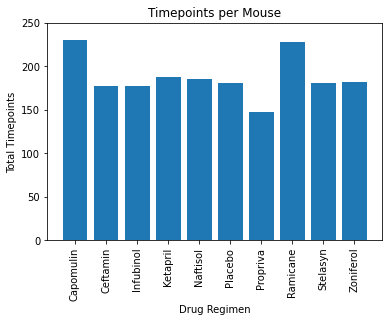

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(time_data.index,time_data.values)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
plt.ylim(0,250)
plt.title("Timepoints per Mouse")

<AxesSubplot:title={'center':'Male vs Female Mice'}, ylabel='Mouse ID'>

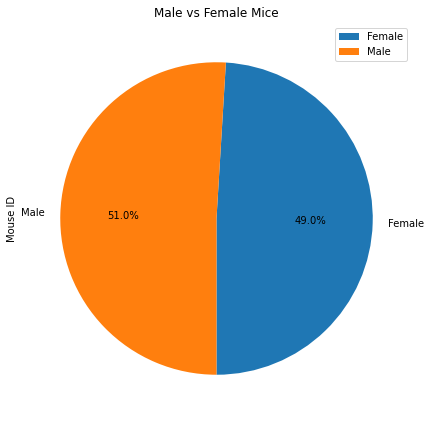

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex= clean_data_df.groupby(["Sex"]).count()
mouse_sex.plot(kind = "pie", y = "Mouse ID", title = "Male vs Female Mice", figsize = (7,8), autopct="%1.1f%%",
              startangle = 270)

Text(0.5, 1.0, 'Male vs Female Mice')

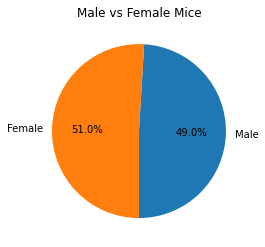

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(mouse_sex["Mouse ID"], labels = labels, autopct="%1.1f%%", startangle = 270)
plt.title("Male vs Female Mice")

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
prosp_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol = []
# Start by getting the last (greatest) timepoint for each mouse
last_mouse = clean_data_df.groupby(["Mouse ID"])["Timepoint"].max()
last_mouse_df = pd.DataFrame(last_mouse)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_clean_df = pd.merge(clean_data_df, last_mouse_df, on = ("Mouse ID", "Timepoint"), how = "right")
new_clean_df.tail(60)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
188,u149,Ceftamin,Male,24,29,25,52.925348,0
189,u153,Ceftamin,Female,11,25,0,45.000000,0
190,u196,Ramicane,Male,18,25,45,40.667713,3
191,u327,Ketapril,Male,17,25,45,66.268801,2
192,u364,Capomulin,Male,18,17,45,31.023923,3
193,u946,Propriva,Male,5,30,20,49.110050,1
194,v199,Naftisol,Female,17,29,0,45.000000,0
195,v289,Ketapril,Female,3,26,25,56.720095,0
196,v295,Naftisol,Female,2,27,40,65.466074,3
197,v339,Infubinol,Male,20,26,5,46.250112,0


In [14]:
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in prosp_drugs:
    prosp_df = new_clean_df.loc[new_clean_df["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
# add subset 
    tumor_vol.append(prosp_df)
    
# Determine outliers using upper and lower bounds
    quartiles = prosp_df.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    upperbound = upperq + (1.5*iqr)
    lowerbound = lowerq - (1.5*iqr)
    
    outliers = prosp_df.loc[(prosp_df < lowerbound)|(prosp_df > upperbound)]
    print(outliers)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


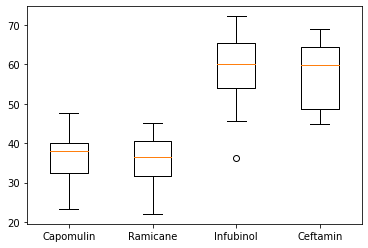

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol,labels=prosp_drugs)
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

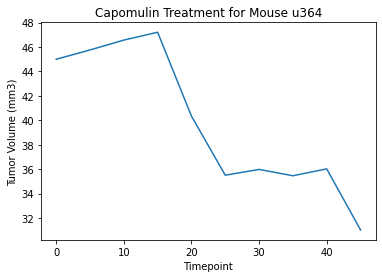

In [30]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
u364 = clean_data_df.loc[clean_data_df["Mouse ID"] == "u364",:]
x_u364 = u364["Timepoint"]
y_u364 = u364["Tumor Volume (mm3)"]
plt.title("Capomulin Treatment for Mouse u364")
plt.plot(x_u364,y_u364)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

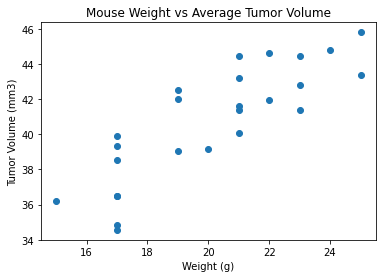

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin",:]
capo_avg = capo_df.groupby(["Mouse ID"]).mean()
capo_avg
x_capo = capo_avg["Weight (g)"]
y_capo = capo_avg["Tumor Volume (mm3)"]
plt.scatter(x_capo,y_capo)
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [40]:
# Calculate the correlation coefficient
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_capo, y_capo)
correlation
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


In [46]:
#calculate the linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_capo, y_capo)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line = slope * x_capo + intercept

Text(20, 38, 'y = 0.95x + 21.55')

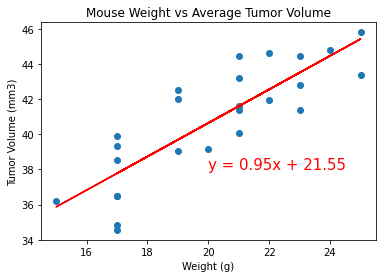

In [71]:
plt.scatter(x_capo,y_capo)
plt.plot(x_capo,line,"r-")
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.annotate(line_eq, (20,38), fontsize = 15, color = "red")